In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("yellow_tripdata_2017-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710124 entries, 0 to 9710123
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06,9.710124e+06
mean,1.547079e+00,1.628982e+00,2.813899e+00,1.039581e+00,1.641065e+02,1.617627e+02,1.337541e+00,1.237423e+01,3.234861e-01,4.975229e-01,1.751269e+00,2.764163e-01,2.996799e-01,1.552673e+01
std,4.977787e-01,1.271994e+00,3.611680e+00,5.059084e-01,6.664998e+01,7.067207e+01,4.913703e-01,2.652315e+02,4.425577e-01,4.881278e-02,2.571253e+00,1.638840e+00,1.341976e-02,2.653479e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.500000e+02,-5.520000e+01,-5.000000e-01,-4.100000e+01,-1.500000e+01,-3.000000e-01,-3.503000e+02
25%,1.000000e+00,1.000000e+00,9.500000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.300000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.260000e+00,0.000000e+00,3.000000e-01,1.675000e+01
max,2.000000e+00,9.000000e+00,2.647100e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.259008e+05,5.554000e+01,5.650000e+01,9.999900e+02,9.110800e+02,3.000000e-01,6.259016e+05


In [6]:
# Since the data is very huge we need to filter the data based on our needs
df1 = df[(df['RatecodeID']==1) & (df['total_amount']<75) & (df['payment_type']==1) & ((df['trip_distance']!=0) & df['total_amount']!=0) & (df['trip_distance']<80)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311410 entries, 0 to 9710123
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 866.7+ MB


In [7]:
df1 = df1.drop(df1.index[500000:],0)

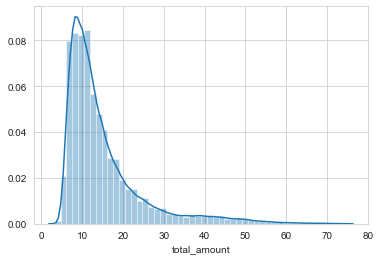

In [8]:
sns.distplot(df1['total_amount'])

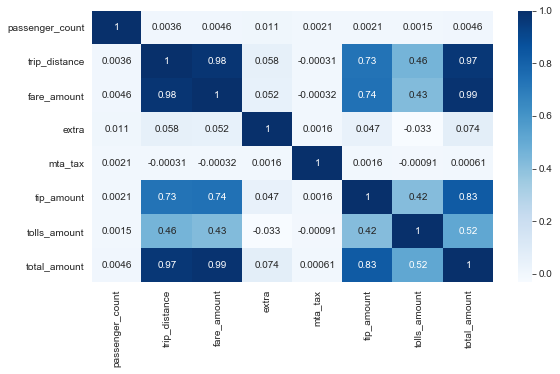

In [9]:
plt.figure(figsize=(9,5))
#Removed all the categorical value columns to get the actual data to work on
sns.heatmap(df1[['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount','total_amount']].corr(),annot=True, cmap='Blues')

In [10]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [11]:
x = df1[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']]
y = df1['total_amount']

In [12]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [28]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
x_train.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount'],
      dtype='object')

In [30]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])

In [31]:
df1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.558768,1.688450,2.766236,1.0,160.331298,158.040290,1.0,11.517600,0.246570,0.499931,2.343946,0.166672,0.299999,15.080165
std,0.496535,1.286352,2.785447,0.0,67.933251,72.863457,0.0,7.833594,0.260602,0.005873,1.861029,0.958197,0.000424,9.778231
min,1.000000,1.000000,0.010000,1.0,1.000000,1.000000,1.0,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000
25%,1.000000,1.000000,1.100000,1.0,107.000000,100.000000,1.0,6.500000,0.000000,0.500000,1.250000,0.000000,0.300000,8.800000
50%,2.000000,1.000000,1.800000,1.0,161.000000,161.000000,1.0,9.000000,0.000000,0.500000,1.950000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.250000,1.0,233.000000,233.000000,1.0,13.500000,0.500000,0.500000,2.820000,0.000000,0.300000,17.300000
max,2.000000,6.000000,27.620000,1.0,265.000000,265.000000,1.0,74.000000,1.000000,0.500000,62.000000,50.000000,0.300000,74.920000


In [32]:
cdf

,Coeff
passenger_count,0.000926
trip_distance,-0.000260
fare_amount,1.000546
extra,1.000426
mta_tax,1.010594
tip_amount,0.999434
tolls_amount,0.998972


In [33]:
y_pred = lm.predict(x_test)

In [34]:
y_pred

array([ 8.16276845,  7.25379628, 34.10940296, ..., 15.95520953,
       20.17005137, 18.3088633 ])

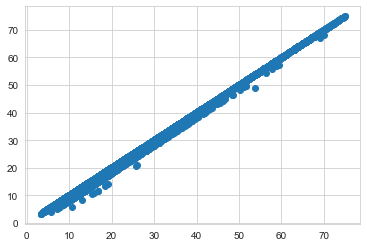

In [45]:
plt.scatter(y_test,y_pred)

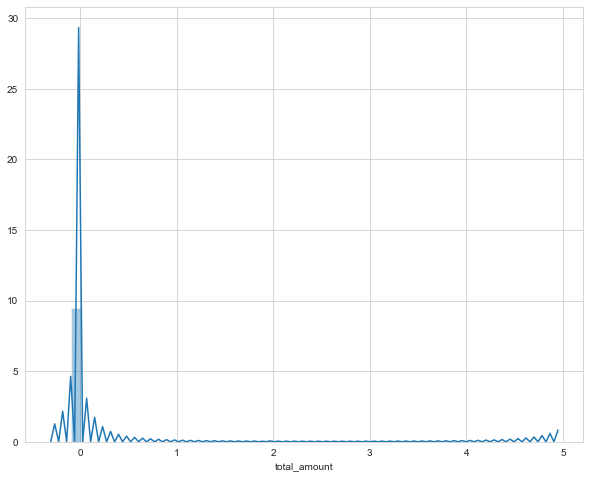

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-y_pred,bins=50)

In [37]:
from sklearn import metrics

In [38]:
print("MAE is:\t",metrics.mean_absolute_error(y_test,y_pred))
print("MSE is:\t",metrics.mean_squared_error(y_test, y_pred))
print("RMSE is:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE is:	 0.01090101412486229
MSE is:	 0.01177316900270165
RMSE is: 0.1085042349528425
